# Extract BTC Data from Coinbase API

In [1]:
import pandas as pd

In [2]:
from Historic_Crypto import HistoricalData

df= HistoricalData('BTC-USD',86400,'2021-01-01-00-00').retrieve_data()

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction...
Data Extracted from API...


In [3]:
df.head()

,low,high,open,close,volume
time,,,,,
2021-01-01,28700.00,29688.88,28990.08,29412.84,22211.252518
2021-01-02,29039.00,33300.00,29413.29,32225.91,46675.246521
2021-01-03,32008.62,34810.00,32222.88,33080.66,36951.716506
2021-01-04,27678.00,33666.99,33082.84,32019.99,46045.389685
2021-01-05,29891.13,34499.67,32020.22,34030.64,42282.569200


In [4]:
#Reset index
df.reset_index(inplace=True)

In [5]:
#Column rename
df= df.rename(columns={'time':'Date', 'low': 'Low','high': 'High', 'open': 'Open', 'close': 'Close' })

In [6]:
#delete columns
del df['volume']
del df['High']
del df['Low']
del df['Open']

In [7]:
#Sort columns
column_names = ["Date", "Close"]

df = df.reindex(columns=column_names)

In [8]:
df= df.rename(columns={'Date':'Date', 'Close': 'BTC_price'})

In [9]:
df.head()

,Date,BTC_price
0,2021-01-01,29412.84
1,2021-01-02,32225.91
2,2021-01-03,33080.66
3,2021-01-04,32019.99
4,2021-01-05,34030.64


# Extract ETH Data from Coinbase API


In [10]:
from Historic_Crypto import HistoricalData

df_eth= HistoricalData('ETH-USD',86400,'2021-01-01-00-00').retrieve_data()

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction...
Data Extracted from API...


In [11]:
df_eth.head()

,low,high,open,close,volume
time,,,,,
2021-01-01,717.10,750.00,737.89,730.99,1.980604e+05
2021-01-02,715.22,789.21,730.97,775.30,3.688993e+05
2021-01-03,770.00,1015.14,775.29,980.44,8.587438e+05
2021-01-04,886.33,1168.99,980.44,1042.38,1.103883e+06
2021-01-05,975.00,1136.93,1042.24,1103.73,8.584959e+05


In [12]:
#Reset index
df_eth.reset_index(inplace=True)

In [13]:
#Column rename
df_eth= df_eth.rename(columns={'time':'Date', 'low': 'Low','high': 'High', 'open': 'Open', 'close': 'Close' })

In [14]:
#delete columns
del df_eth['volume']
del df_eth['High']
del df_eth['Low']
del df_eth['Open']

In [15]:
#Sort columns
column_names = ["Date", "Close"]

df_eth = df_eth.reindex(columns=column_names)

In [16]:
df_eth= df_eth.rename(columns={'Date':'Date', 'Close': 'ETH_price'})

In [26]:
df_eth.head()

,Date,ETH_price
0,2021-01-01,730.99
1,2021-01-02,775.30
2,2021-01-03,980.44
3,2021-01-04,1042.38
4,2021-01-05,1103.73


# Upload DOGE data from Kaggle

In [18]:
df_doge=pd.read_csv('/Users/mikel/Documents/Projects/Crypto_tweets/DOGE-USD.csv')

In [19]:
df_doge.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [20]:
#delete columns
del df_doge['Volume']
del df_doge['High']
del df_doge['Low']
del df_doge['Open']
del df_doge['Adj Close']

In [21]:
df_doge= df_doge.rename(columns={'Close': 'DOGE_price'})

In [24]:
df_doge.head()

,Date,DOGE_price
0,2014-09-17,0.000268
1,2014-09-18,0.000298
2,2014-09-19,0.000277
3,2014-09-20,0.000292
4,2014-09-21,0.000288


# Extract Data from Twitter API

In [27]:
import tweepy
import csv

In [ ]:
f=open("/Users/mikel/Documents/Projects/Crypto_tweets/twitter_keys.txt","rb")
lines=f.readlines()
consumer_key=lines[0]
consumer_secret=lines[1]
access_key=lines[2]
access_secret=lines[3]
f.close()

In [28]:
consumer_key='hvicONy4ywTet4urtfkO8P4Oh'
consumer_secret='EQGxQ3D96KaLt84f1QWqqz9kHzJiHHWjD932HJvtksv2qfKX7P'
access_key='1144930963111206912-BiaqX2ljEEP302g1NsMhdEYASn3Ru1'
access_secret='nvlJvQBzgQnYcPW4Mo4gNDUEXToQLI1luSPpMsnalRQzz'

In [29]:
Defense  get_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    #read csv
    with open('/Users/mikel/Documents/Projects/Crypto_tweets/elonmusk_tweets.csv', 'r') as elonmusk:
        elon_tweets=list(csv.reader(elonmusk))
    
    alltweets=[]
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    elon_tweets+=outtweets
    
    #write the csv  
    with open('/Users/mikel/Documents/Projects/Crypto_tweets/elonmusk_tweets.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(elon_tweets)
    pass
    

In [ ]:
#get_tweets('elonmusk')

In [30]:
df_elon=pd.read_csv('/Users/mikel/Documents/week3/Proyecto_ETL/new_elonmusk_tweets.csv')

In [31]:
#Drop duplicates
df_elon=df_elon.drop_duplicates(keep='first')

In [32]:
#Drop id column
del df_elon['id']

In [33]:
#Drop nulls
df_elon=df_elon.dropna()

In [34]:
#Select the tweets that contain crypto topics givin boolean value True/False.
crypto_topics_lst = ['bitcoin', 'Bitcoin', 'crypto', 'Crypto', 'Blockchain', 
                     'blockchain', 'Regulation', 'Doge', 'doge', 'DOGE', 'Ethereum', 
                     'ethereum', 'Money', 'money', 'Currency', 'currency', 
                    'Coin', 'coin', 'DeFi', 'ETF', 'BTC']

new_lst=[]
        
for i in df_elon['text']:
    new_lst.append(any(ele in i for ele in crypto_topics_lst))

In [35]:
#Transform that list into a new column
df_elon['boolean']=new_lst

In [36]:
#Small changes
df_elon=df_elon[~df_elon.created_at.str.contains("created_at")]
df_elon = df_elon.rename(columns={'created_at':'Date', 'text': 'Tweet','boolean': 'Elon_tweet'})

In [37]:
#Change the date so it has the same structure as df
df_elon['Date']=df_elon['Date'].str[:10]

In [38]:
#restart index
df_elon=df_elon.reset_index(drop=True)

In [39]:
#Create a new df that collects al the tweets about crypto topics
df_elon_true=df_elon.loc[df_elon['Elon_tweet'] == True]

In [40]:
#Drop duplicates
df_elon_true=df_elon_true.drop_duplicates()

In [41]:
df_elon_true= df_elon_true[~df_elon_true['Tweet'].astype(str).str.startswith('@')]

In [42]:
df_elon_true

,Date,Tweet,Elon_tweet
4,2021-05-13,Working with Doge devs to improve system trans...,True
6,2021-05-13,"To be clear, I strongly believe in crypto, but...",True
10,2021-05-12,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,True
20,2021-05-11,Do you want Tesla to accept Doge?,True
30,2021-05-09,SpaceX launching satellite Doge-1 to the moon ...,True
49,2021-05-07,"Cryptocurrency is promising, but please invest...",True
116,2021-04-28,The Dogefather\nSNL May 8,True
215,2021-04-15,Doge Barking at the Moon https://t.co/QFB81D7zOL,True
342,2021-04-03,Me in my sick new car\n(left him the money) ht...,True
348,2021-04-01,SpaceX is going to put a literal Dogecoin on t...,True


# Table fusion

In [43]:
df.dtypes

Date         datetime64[ns]
BTC_price           float64
dtype: object

In [44]:
df_doge.dtypes

Date           object
DOGE_price    float64
dtype: object

In [45]:
df_elon_true.dtypes

Date          object
Tweet         object
Elon_tweet      bool
dtype: object

In [46]:
df_eth.dtypes

Date         datetime64[ns]
ETH_price           float64
dtype: object

In [47]:
#Change date type in elonDF and dogeDF so we can merge them
df_elon_true.Date=df_elon_true.Date.astype(dtype='datetime64[ns]')
df_elon_true.Tweet=df_elon_true.Tweet.astype(dtype='object')
df_doge.Date=df_doge.Date.astype(dtype='datetime64[ns]')

In [48]:
#Table merge
crypto_df=pd.merge(df, df_doge, 'left', left_on='Date', right_on='Date')

In [49]:
crypto_df.head()

,Date,BTC_price,DOGE_price
0,2021-01-01,29412.84,0.005685
1,2021-01-02,32225.91,0.010615
2,2021-01-03,33080.66,0.009771
3,2021-01-04,32019.99,0.009767
4,2021-01-05,34030.64,0.009920


In [50]:
#Table merge
crypto_df=pd.merge(crypto_df, df_eth, 'left', left_on='Date', right_on='Date')

In [51]:
crypto_df.head()

,Date,BTC_price,DOGE_price,ETH_price
0,2021-01-01,29412.84,0.005685,730.99
1,2021-01-02,32225.91,0.010615,775.30
2,2021-01-03,33080.66,0.009771,980.44
3,2021-01-04,32019.99,0.009767,1042.38
4,2021-01-05,34030.64,0.009920,1103.73


In [52]:
#Table merge
crypto_df=pd.merge(crypto_df, df_elon_true, 'left', left_on='Date', right_on='Date')

In [53]:
crypto_df.head()

,Date,BTC_price,DOGE_price,ETH_price,Tweet,Elon_tweet
0,2021-01-01,29412.84,0.005685,730.99,NaN,NaN
1,2021-01-02,32225.91,0.010615,775.30,NaN,NaN
2,2021-01-03,33080.66,0.009771,980.44,NaN,NaN
3,2021-01-04,32019.99,0.009767,1042.38,NaN,NaN
4,2021-01-05,34030.64,0.009920,1103.73,NaN,NaN


In [54]:
#I decide to keep only one tweet per day so data is cleaner

crypto_tweets=crypto_df.drop_duplicates(subset='Date', keep="last")

In [55]:
print(set(crypto_tweets['Elon_tweet']))


{nan, True}


In [56]:
crypto_tweets.Elon_tweet=crypto_tweets.Elon_tweet.replace(to_replace =(True), value = 'Yes')

/Users/mikel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
crypto_tweets.Elon_tweet=crypto_tweets.Elon_tweet.fillna('No')

In [58]:
crypto_tweets.loc[crypto_tweets['Elon_tweet'] == 'Yes']

,Date,BTC_price,DOGE_price,ETH_price,Tweet,Elon_tweet
36,2021-02-04,36975.00,0.053289,1597.55,Doge,Yes
38,2021-02-06,39265.43,0.057595,1679.77,The future currency of Earth,Yes
39,2021-02-07,38871.42,0.078782,1615.32,🎶 Who let the Doge out 🎶,Yes
40,2021-02-08,46448.10,0.078825,1752.98,Ð is for Ðogecoin! Instructional video.\nhttps...,Yes
42,2021-02-10,44850.00,0.072896,1742.93,"Bought some Dogecoin for lil X, so he can be a...",Yes
43,2021-02-11,47997.91,0.069676,1787.32,"Frodo was the underdoge,\nAll thought he would...",Yes
46,2021-02-14,48680.69,0.062537,1803.75,If major Dogecoin holders sell most of their c...,Yes
53,2021-02-20,55923.52,0.054384,1915.46,Heard a rumor some crypto coin was pegging the...,Yes
54,2021-02-21,57489.16,0.055980,1935.57,Dojo 4 Doge,Yes
62,2021-03-01,49639.40,0.050599,1571.82,Doge meme shield (legendary item) https://t.co...,Yes


In [59]:
crypto_tweets.to_excel("crypto_tweets.xlsx", sheet_name='Crypto_tweets')

In [80]:
crypto_tweets

,Date,BTC_price,DOGE_price,ETH_price,Tweet,Elon_tweet
0,2021-01-01,29412.84,0.005685,730.99,NaN,No
1,2021-01-02,32225.91,0.010615,775.30,NaN,No
2,2021-01-03,33080.66,0.009771,980.44,NaN,No
3,2021-01-04,32019.99,0.009767,1042.38,NaN,No
4,2021-01-05,34030.64,0.009920,1103.73,NaN,No
...,...,...,...,...,...,...
144,2021-05-17,43580.50,0.487892,3283.32,NaN,No
145,2021-05-18,42857.15,0.476115,3375.96,NaN,No
146,2021-05-19,36731.75,0.333123,2443.91,Credit to our Master of Coin,Yes
147,2021-05-20,40623.33,0.400194,2775.07,How much is that Doge in the window? https://t...,Yes


# Cointegration for BTC and DOGE

In [61]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [62]:
import matplotlib.pyplot as plt

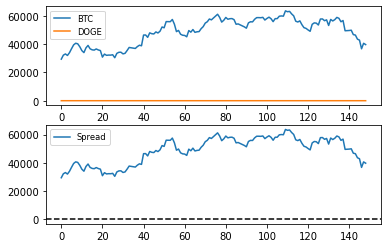

In [64]:
plt.subplot(2,1,1)
plt.plot(crypto_tweets.BTC_price, label='BTC')
plt.plot(crypto_tweets.DOGE_price, label='DOGE')
plt.legend(loc='best', fontsize='small')

plt.subplot(2,1,2)
plt.plot(crypto_tweets.BTC_price - crypto_tweets.DOGE_price, label ='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle= '--', color = 'k')
plt.show()

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
result_btc=adfuller(crypto_tweets.BTC_price)
print('The P value for the ADF test on BTC is ', result_btc[1])
result_doge=adfuller(crypto_tweets.DOGE_price)
print('The P value for the ADF test on DOGE is ', result_doge[1])
result_spread=adfuller(crypto_tweets.BTC_price -crypto_tweets.DOGE_price)
print('The P value for the ADF test on Spread is ', result_spread[1])

The P value for the ADF test on BTC is  0.31850977399508484
The P value for the ADF test on DOGE is  0.998622180976128
The P value for the ADF test on Spread is  0.3185131868429118


# Cointegration for ETH and BTC

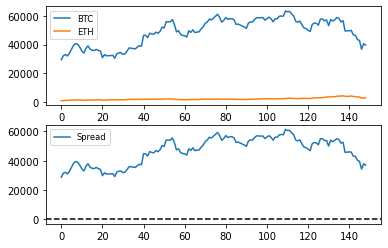

In [67]:
plt.subplot(2,1,1)
plt.plot(crypto_tweets.BTC_price, label='BTC')
plt.plot(crypto_tweets.ETH_price, label='ETH')
plt.legend(loc='best', fontsize='small')

plt.subplot(2,1,2)
plt.plot(crypto_tweets.BTC_price - crypto_tweets.ETH_price, label ='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle= '--', color = 'k')
plt.show()

In [68]:
result_btc=adfuller(crypto_tweets.BTC_price)
print('The P value for the ADF test on BTC is ', result_btc[1])
result_doge=adfuller(crypto_tweets.ETH_price)
print('The P value for the ADF test on DOGE is ', result_doge[1])
result_spread=adfuller(crypto_tweets.BTC_price -crypto_tweets.ETH_price)
print('The P value for the ADF test on Spread is ', result_spread[1])

The P value for the ADF test on BTC is  0.31850977399508484
The P value for the ADF test on DOGE is  0.7969222691772057
The P value for the ADF test on Spread is  0.34384534377543874


# Cointegration for ETH and BTC

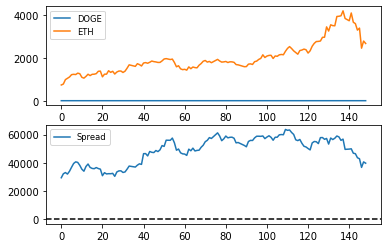

In [74]:
plt.subplot(2,1,1)
plt.plot(crypto_tweets.DOGE_price, label='DOGE')
plt.plot(crypto_tweets.ETH_price, label='ETH')
plt.legend(loc='best', fontsize='small')

plt.subplot(2,1,2)
plt.plot(crypto_tweets.BTC_price - crypto_tweets.DOGE_price, label ='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle= '--', color = 'k')
plt.show()

In [75]:
result_eth=adfuller(crypto_tweets.ETH_price)
print('The P value for the ADF test on ETH is ', result_eth[1])
result_doge=adfuller(crypto_tweets.DOGE_price)
print('The P value for the ADF test on DOGE is ', result_doge[1])
result_spread=adfuller(crypto_tweets.DOGE_price -crypto_tweets.ETH_price)
print('The P value for the ADF test on Spread is ', result_spread[1])

The P value for the ADF test on ETH is  0.7969222691772057
The P value for the ADF test on DOGE is  0.998622180976128
The P value for the ADF test on Spread is  0.7969183064927543


# Correlation

In [70]:
import numpy as np

In [73]:
np.corrcoef(crypto_tweets.ETH_price, crypto_tweets.DOGE_price)

array([[1.        , 0.92067428],
       [0.92067428, 1.        ]])